In [1]:
!git clone https://github.com/anantgupta129/TorcHood.git

Cloning into 'TorcHood'...
remote: Enumerating objects: 1008, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 1008 (delta 10), reused 18 (delta 8), pack-reused 984
Receiving objects: 100% (1008/1008), 515.74 KiB | 2.09 MiB/s, done.
Resolving deltas: 100% (693/693), done.


In [1]:
%cd TorcHood

/home/deepanshudashora/Desktop/ERAV1/session18/VAE/TorcHood


In [2]:
import warnings
warnings.filterwarnings("ignore")

import os
import torch
import lightning.pytorch as pl

from torchood.data.mnist_datamodule import MNISTDataModule
from torchood.models.variational_auto_encoders_module import VAE

In [3]:
import torchvision.transforms as transforms
from torchvision import datasets


class MNISTToRGB:
    def __call__(self, img):
        img = torch.cat([img, img, img], dim=0)  # Duplicate the single channel into three channels
        return img
train_transform = transforms.Compose(
            [
                transforms.Resize((32, 32)),
                transforms.ToTensor(),
                MNISTToRGB(),  # Convert to 3 channels
                transforms.Normalize((0.1307, 0.1307, 0.1307), (0.3081, 0.3081, 0.3081)),
            ]
        )
datamodule = MNISTDataModule(val_batch_size=1,train_augments=train_transform)

100%|██████████| 9912422/9912422 [00:02<00:00, 4221749.31it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 764822.80it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 5777271.97it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13530205.09it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [9]:
from lightning.pytorch.loggers import WandbLogger
from lightning.pytorch.loggers import CSVLogger
from lightning.pytorch import Trainer

# Optional: Logging with Weights & Biases
logger = [WandbLogger(project="VAE-MNIST"),CSVLogger(save_dir="csv_logs")]
model = VAE()
trainer = Trainer( max_epochs=30, accelerator="gpu",logger=logger)
trainer.fit(model=model, datamodule=datamodule)

INFO:lightning_fabric.utilities.seed:Global seed set to 1234
<ipython-input-6-e541b323d45c>:14: UnderReviewWarning: The feature resnet18_encoder is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  self.encoder = resnet18_encoder(False, False) # 128 ch
<ipython-input-2-da6057d5e4d4>:353: UnderReviewWarning: The feature ResNetEncoder is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  return ResNetEncoder(EncoderBlock, [2, 2, 2, 2], first_conv, maxpool1)
<ipython-input-2-da6057d5e4d4>:236: UnderReviewWarning: The feature EncoderBl

Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.


In [12]:
trainer.save_checkpoint("trained_mnist_model.ckpt")

In [5]:
vae = VAE.load_from_checkpoint("trained_mnist_model.ckpt")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

<Figure size 2400x900 with 0 Axes>

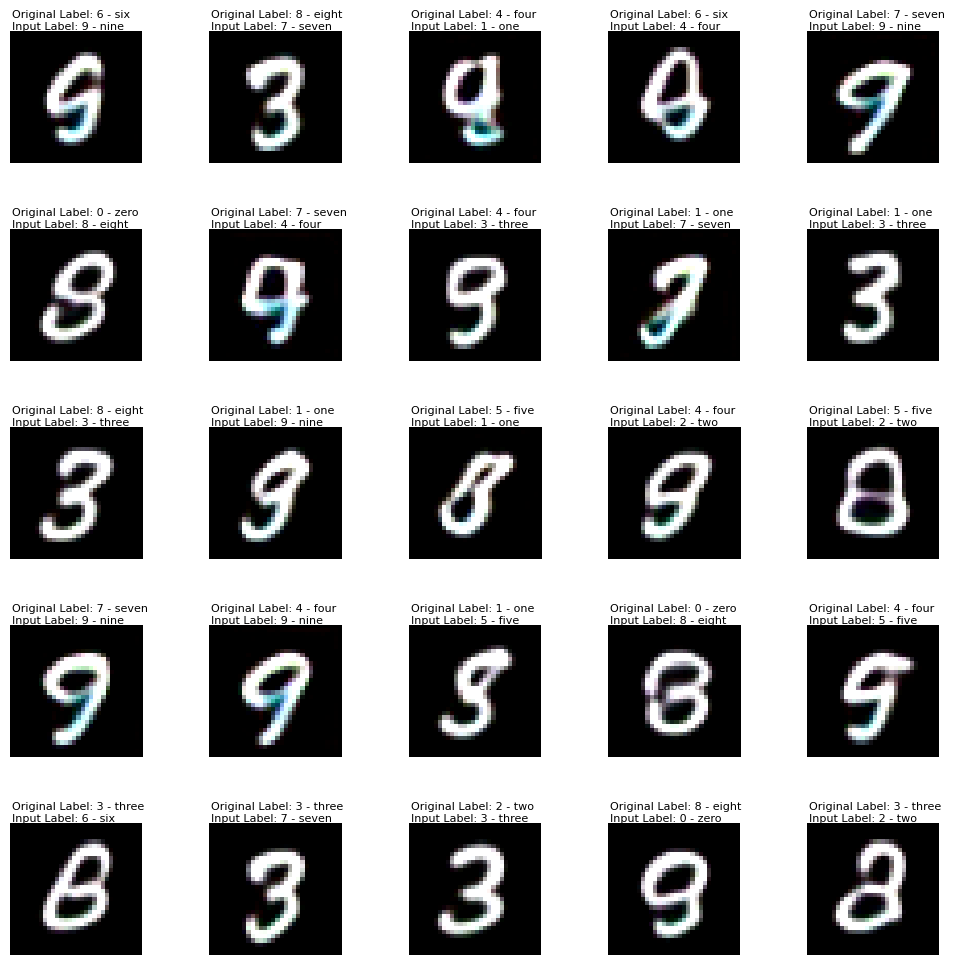

In [7]:
from torchood.utils.plotting import plot_vae_examples
test_loader = datamodule.val_dataloader()
classes = datamodule.class_names
mean = (0.1407, 0.1407, 0.1407)
std = (0.4081, 0.4081, 0.4081)
vae.to("cuda")
plot_vae_examples(test_loader,classes, vae.net, mean, std)